# Social Network Ads

https://www.kaggle.com/rakeshrau/social-network-ads



In [86]:
# Ignore warning
import warnings
warnings.filterwarnings("ignore")

# Import main libraries
import pandas as pd
import numpy as np

# Encode categorial features
import category_encoders as ce

# Visualisation
import matplotlib.pyplot as plt

# Interactive visualisation
import plotly.offline as py 
py.init_notebook_mode(connected=True)                  
import plotly.graph_objs as go                         
import plotly.tools as tls  
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff

# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  RandomForestClassifier

# Machine Learning libraries
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix
from sklearn import tree
from sklearn.metrics import confusion_matrix





In [87]:
# Read of the data
df = pd.read_csv("Social_Network_Ads.csv")

# Display the top 5 observations of the dataframe
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


# Exploratory Data Analysis (EDA)

In [88]:
# Info of the data types and count of non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


- Dataset contain 400 records and 5 features.

- No missing values

- Target variable is the Purchased variable.

In [89]:
# Basic stats of the numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,400.0,1.569154e+07,71658.321581,15566689.0,15626763.75,15694341.5,15750363.0,15815236.0
Age,400.0,3.765500e+01,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,6.974250e+04,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,3.575000e-01,0.479864,0.0,0.00,0.0,1.0,1.0


In [90]:
# Histogram of Estimated salary 
data = px.histogram(df, x="EstimatedSalary", color="Gender", histnorm="percent")

layout = go.Layout(
    height=500,
    title={'text': "Estimated Salary Distribution by Gender", # Subplot main title
           'y':0.95, # Set main title y-axis position
           'x':0.5, # Set main title x-axis position
           'xanchor': 'center', # xachor position
           'yanchor': 'top'}) # yachpr 


# Create another variable to generate the plot. This variable is composed by the other two variables created earlier
fig = go.Figure(data=data, layout=layout)


# Use update_layout in order to define few configuration such as figure height and width, title, etc
fig.update_layout(
    height=600, # Figure height
    width=900, # Figure width
    title={
        'text': 'Estimated Salary Distribution by Gender', # Subplot main title
        'y':0.95, # Set main title y-axis position
        'x':0.5, # Set main title x-axis position
        'xanchor': 'center', # xachor position
        'yanchor': 'top'}, # yachpr
    showlegend=False) # legend false

# Display the plot
py.iplot(fig, filename="Estimated Salary Distribution by Gender")

From the plot above it can be said that the women have a Estimated Salary higher when compared to men. 

In [91]:

# Select Age feature
data = df['Age']

# Create two variables to store mean and standard deviation of the Age variable
m = data.mean()
s = data.std()

# Calculate the Gaussian distribution based on the mean and standard deviation
gaussian_data = np.random.normal(m, s, 400)


# Create figure
fig = ff.create_distplot(
    [data, gaussian_data], # Add Age and the Gaussian distribution
    group_labels=["plot", "gaussian"], # Add the labels
    curve_type="kde") # Curve type kde

# Include Histogram, Line and Gaussian Distribution
fig.data = [fig.data[0], fig.data[2], fig.data[3]]

# Update layout object to set legend as false
# Use update_layout in order to define few configuration such as figure height and width, title, etc
fig.update_layout(
    height=600, # Figure height
    width=900, # Figure width
    title={
        'text': 'Distribution of Age variable', # Subplot main title
        'y':0.95, # Set main title y-axis position
        'x':0.5, # Set main title x-axis position
        'xanchor': 'center', # xachor position
        'yanchor': 'top'}, # yachpr
    showlegend=False) # legend false

# Display 
fig.show()

The variable age seems to have a normal distribution. 

In [92]:
# Create figure to plot a Scatter plot using Age and EstimatedSalary variables
# Color based on the Gender and use facet_col in order to split the plots based the Gender variable
fig = px.scatter(df, x="Age", y="EstimatedSalary", color="Gender", facet_col="Gender")

# Display figure
fig.show()

There is no correlation between the estimated salary of a male or female with their age.

In [93]:
# Create a new dataframe in order to genereate an appropriate data structure
df2=df[['Gender','Purchased','User ID']].groupby(by=['Gender','Purchased'])\
.count().sort_values('Gender', ascending = False).reset_index()

# Grouped Bar Chart using facet col
fig = px.bar(df2, # Use the new DF
             x='Purchased', # x-axis -> Purchased
             y='User ID', # y-axis -> User ID
             color="Gender",  # color based on the gender
             facet_col="Gender") # use facet_col in order to split the plots based on the Gender variable

# Display figure
fig.show()



Conclusion:

- Male purchases less than female.

- Male also rejects the purchase more than female



In [94]:
# Create a variable to store the Bar plot
data = [
    go.Bar(
        x=df['Purchased'].value_counts().keys(), # x-axis -> Count labels
        y=df['Purchased'].value_counts() # y-axis -> Count the classes
    )]

# Create another variable to store all the settings of the Bar plot such as figure size, title, hovermode..
layout = go.Layout(
    height=500,
    title={'text': "Count of Purchase feature classes", # Subplot main title
           'y':0.95, # Set main title y-axis position
           'x':0.5, # Set main title x-axis position
           'xanchor': 'center', # xachor position
           'yanchor': 'top'}, # yachpr 
hovermode='closest',
xaxis=dict(title='Count', ticklen=5, zeroline=False, gridwidth=2, domain=[0.1, 1]), # x-axis settings
yaxis=dict(title='Classes', ticklen=5, gridwidth=2), # y-axis settings
showlegend=False # No legend
)

# Create another variable to generate the plot. This variable is composed by the other two variables created earlier
fig = go.Figure(data=data, layout=layout)

# Display the plot
py.iplot(fig, filename="Count of Purchase feature classes")

The target variable is the Purchase variable. From the plot above is clear that it has unbalanced data which definitely will bring biases to the model.

# Data preprocessing

In [95]:
# Removal of the User ID variable because it does not any add value to the analysis
df = df.drop(['User ID'], axis = 1)

# Display the changes
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


## Encoding categorical data

"When fitting machine learning algorithms (like linear regression, logistic regression, random forests, etc.), we often convert categorical variables to dummy variables, which are numeric variables that are used to represent categorical data.

For example, suppose we have a dataset that contains the categorical variable Gender. To use this variable as a predictor in a regression model, we would first need to convert it to a dummy variable."

https://www.statology.org/pandas-get-dummies/

In [102]:
# Convert Gender variable into numerical type
df = pd.get_dummies(df, columns = ['Gender'], drop_first=True) # Drop_first means keep only one option (Gender Male)

df

,Age,EstimatedSalary,Purchased,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1
...,...,...,...,...
395,46,41000,1,0
396,51,23000,1,1
397,50,20000,1,0
398,36,33000,0,1


## Define X and y 

In [103]:
# Defining X and y (Independent variables and dependent variable)
y = df['Purchased'] # Purchased is the dependent variablee
X = df.drop(['Purchased'], axis = 1) # Drop the Purchased variable and keep all the others

## Train and Test split

In [104]:
# Train and test split: 0.3 test set and 0.7 training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [105]:
# Check the shape of X_train, y_train, X_test, y_test
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((300, 3), (300,), (100, 3), (100,))

## Feature Scaling

In [112]:
# define variable to store the columns 
cols = X_train.columns

# Create StandardScaler object
sc = StandardScaler()

# Fit both sets Train and Test of the X variable
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Create 2 dataframes with all the variables as numerical and standardized for train and test sets
X_train = pd.DataFrame(X_train,columns=cols)
X_test = pd.DataFrame(X_test,columns=cols)

# Models

## kNN

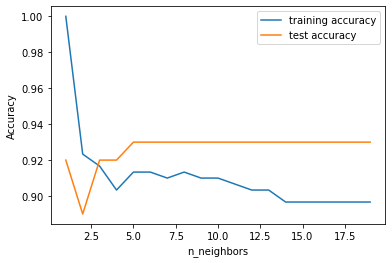

In [113]:

# Create two lists in order to store training and testing accuracy
training_accuracy = []
test_accuracy = []

# try n_neighbors from 1 to 20
neighbors_settings = range(1, 20)

# Use a loop in order to go through each number from 1 to 20
for n_neighbors in neighbors_settings:

# Build the model based on the numbers of the range 
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    
# Train the model on the given k
    clf.fit(X_train, y_train)

# Record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))

# Record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
# Plot the line for the training accuracy in order to identify the optimal k
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")

# Plot the line for the testing accuracy in order to identify the optimal k
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")

# Set ylabel as Accuracy
plt.ylabel("Accuracy")

# Set xlabel as the number of neighbors
plt.xlabel("n_neighbors")

# Set the legend
plt.legend()

# Store the results into a dictionary
res_dfTrain = {}
res_dfTest = {}

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        68
           1       0.88      0.88      0.88        32

    accuracy                           0.92       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.92      0.92      0.92       100



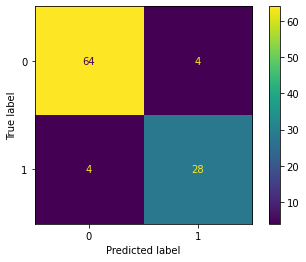

In [114]:
# Based on the plot above the optimal number for k is 3. 
model = KNeighborsClassifier(n_neighbors = 3)

# Train the model
model.fit(X_train, y_train)

# Make predictions using the test data
y_pred = model.predict(X_test)

# Display the classification report
print(classification_report(y_test,y_pred))

# Display the confusion matrix 
plot_confusion_matrix(model,X_test,y_test);

In [115]:
# Predict the results
y_pred = model.predict(X_test)

# Display the confusion matrix
confusion_matrix(y_test,y_pred)

array([[64,  4],
       [ 4, 28]])

In [116]:
# Print train set accuracy
print("Train set accuracy: {:.2f}".format(model.score(X_train, y_train)))

# Print test set accuracy
print("Test set accuracy: {:.2f}".format(model.score(X_test, y_test)))

Train set accuracy: 0.92
Test set accuracy: 0.92


## Decision Tree Classifier

In [117]:
# Create and initialise a DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 7, random_state = 0)

# Train the classifier by calling a method 'fit()'
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=0)

In [118]:
# Calculate the predicted vlaue by calling a method predict()
y_pred = dt.predict(X_test)

In [119]:
# Print train set accuracy
print("Train set accuracy: {:.2f}".format(dt.score(X_train, y_train)))

# Print test set accuracy
print("Test set accuracy: {:.2f}".format(dt.score(X_test, y_test)))

Train set accuracy: 0.96
Test set accuracy: 0.92


              precision    recall  f1-score   support

           0       0.95      0.93      0.94        68
           1       0.85      0.91      0.88        32

    accuracy                           0.92       100
   macro avg       0.90      0.92      0.91       100
weighted avg       0.92      0.92      0.92       100



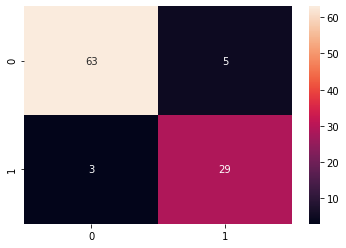

In [120]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test, y_pred)

# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, annot = True)

# print the classification_report based on y_test and y_predict
print(classification_report(y_test, y_pred))

In [137]:
X_train.columns

Index(['Age', 'EstimatedSalary', 'Gender_Male'], dtype='object')

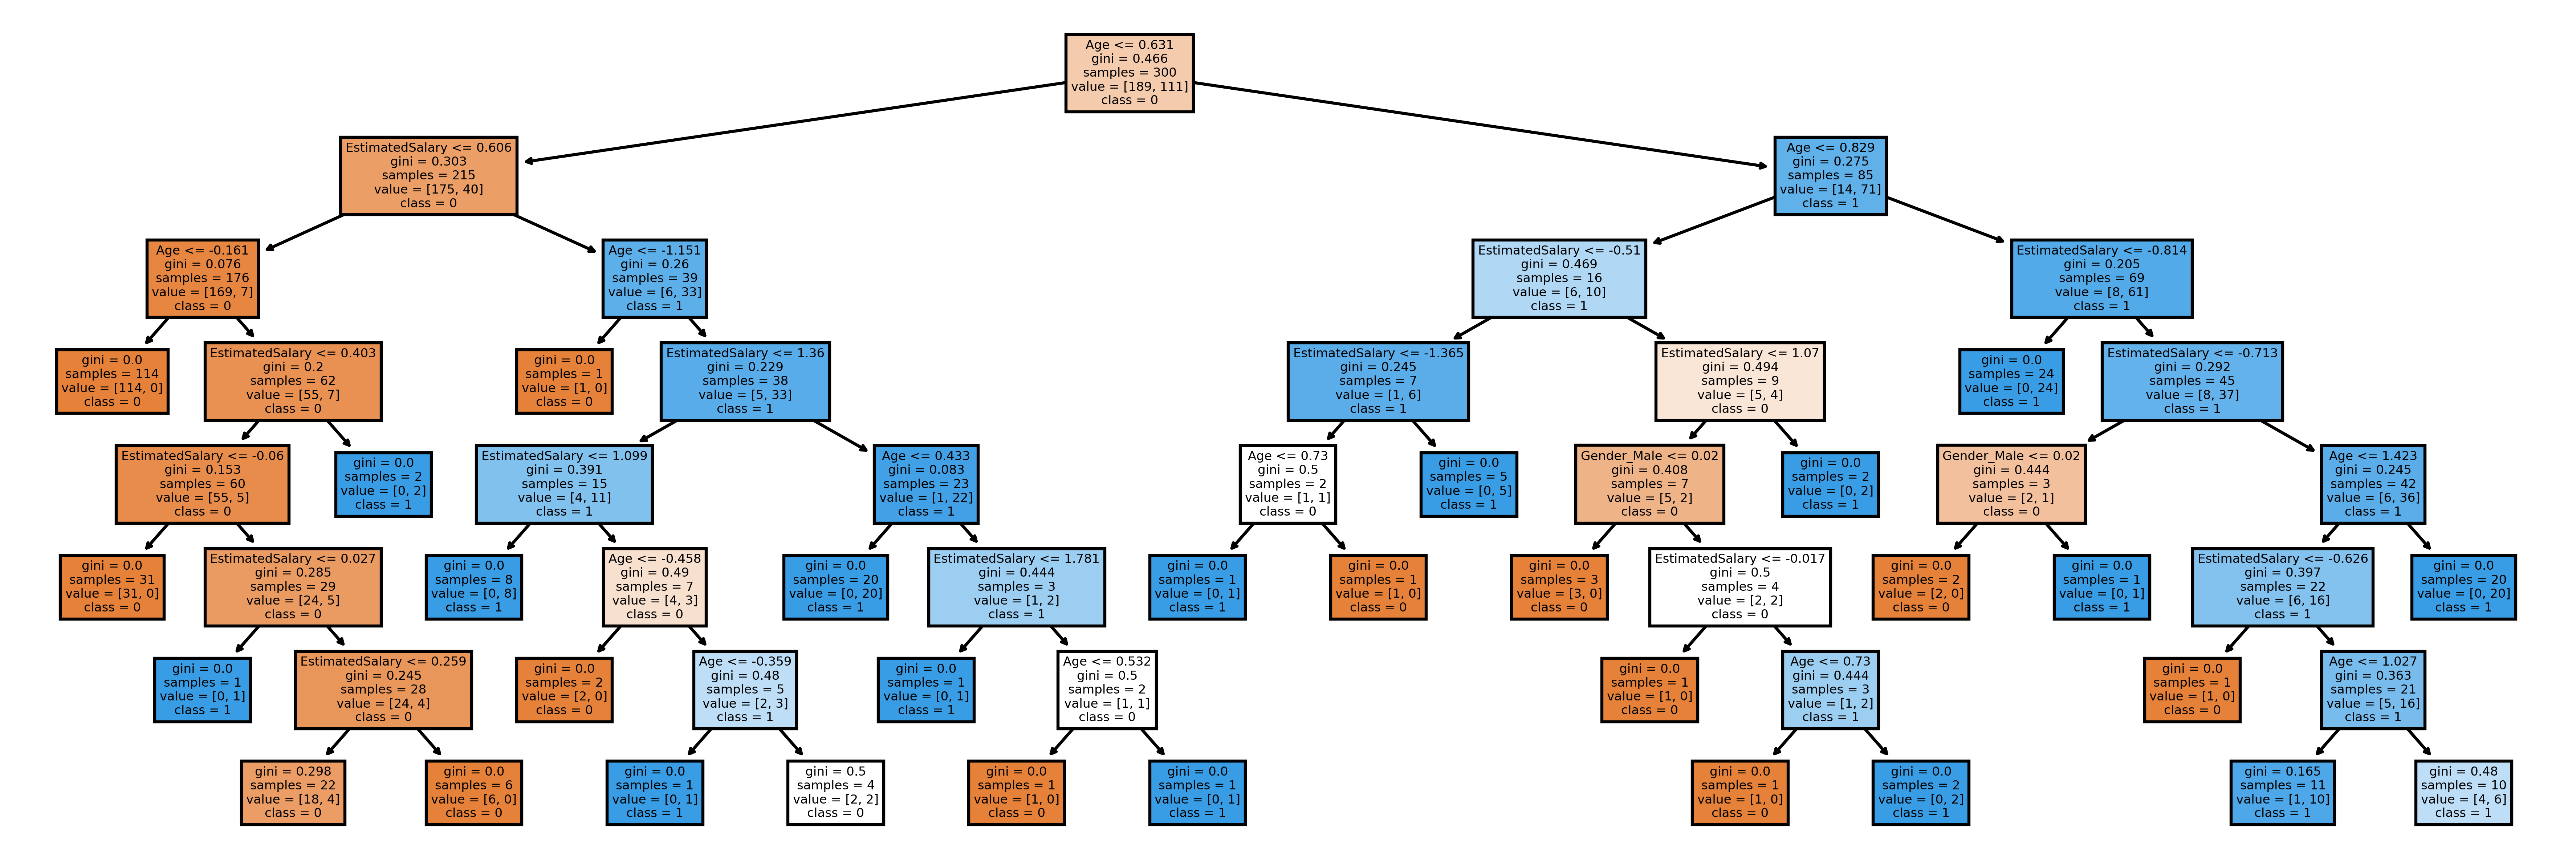

In [138]:
# Column names for dataset
fn=['Age', 'EstimatedSalary', 'Gender_Male']

# Classes of the Output variable
cn=['0','1']

# Setting dpi = 600 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,5), dpi=600)

# Plot tree using tree library
tree.plot_tree(dt, # Decision Tree model
           feature_names = fn, # Feature names define above
           class_names=cn, # Classes defined above
           filled = True); 

## Random Forest Classifier

In [126]:
#Create a Random Forest Classifier 
rf = RandomForestClassifier(n_estimators = 100)

# Train the model using the training sets y_pred=clf.predict(X_test)
rf.fit(X_train,y_train)

# Make predicitons on the test data
y_pred = rf.predict(X_test)

In [127]:
# Print train set accuracy
print("Train set accuracy: {:.2f}".format(rf.score(X_train, y_train)))

# Print test set accuracy
print("Test set accuracy: {:.2f}".format(rf.score(X_test, y_test)))

Train set accuracy: 1.00
Test set accuracy: 0.92


## Random Forest Classifier using GridSearchCV

In [128]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [129]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Display the best parameters searched
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


{'bootstrap': True,
 'max_depth': 80,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 200}

In [130]:
#Create a Random Forest Classifier 
rf = RandomForestClassifier(n_estimators = 200,
                            max_depth = 80,
                            min_samples_leaf=3,
                            min_samples_split=10,
                            max_features= 2)
                            
                         

# Train the model using the training sets y_pred=clf.predict(X_test)
rf.fit(X_train,y_train)

# Make predicitons on the test data
y_pred = rf.predict(X_test)

# Print train set accuracy
print("Train set accuracy: {:.2f}".format(rf.score(X_train, y_train)))

# Print test set accuracy
print("Test set accuracy: {:.2f}".format(rf.score(X_test, y_test)))

Train set accuracy: 0.92
Test set accuracy: 0.94


Model hypertunned managed to narrow the gap to original model.

# Feature Importance

In [131]:
# Feature importances
rf.feature_importances_

array([0.55248026, 0.43893448, 0.00858526])

In [133]:
# Load the dataset 

# Drop the dependent variable of the original data frame
imp = df.drop(["Purchased"], axis = 1) # Drop the Outcome variable and keep all the others

# Transform feature importance into a dataframe
df_importances = pd.DataFrame(rf.feature_importances_, index = imp.columns)

# Display feature importances
df_importances.reset_index(inplace=True)

# Display features importance
df_importances

,index,0
0,Age,0.552480
1,EstimatedSalary,0.438934
2,Gender_Male,0.008585


In [134]:
# Show column names
df_importances.columns

Index(['index', 0], dtype='object')

In [135]:
# Rename columns
df_importances = df_importances.rename(columns={'index': 'Features', 0 : 'Importance'})

# Display the changes
df_importances

,Features,Importance
0,Age,0.552480
1,EstimatedSalary,0.438934
2,Gender_Male,0.008585


In [136]:
# Create figure in order to store the b
fig = px.bar(df_importances, # Use the filtered dataframe
             color = 'Features'
            )

# Update Layout
fig.update_layout(xaxis={'categoryorder':'total descending'}, # Set in descending order
                  title_text = 'Feature Importance of the Random Forest Classifier Model', # Set title 
                  title_x = 0.5 # Set title alignment
                 
                 )


# Display the figure create
fig.show()